In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
import matplotlib.ticker as ticker

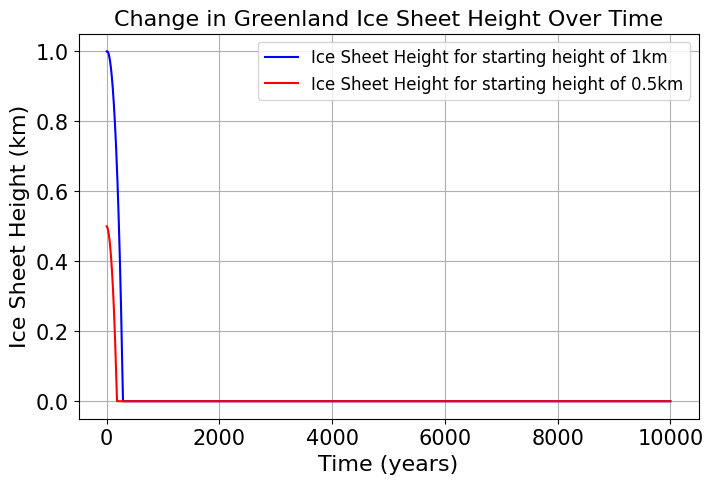

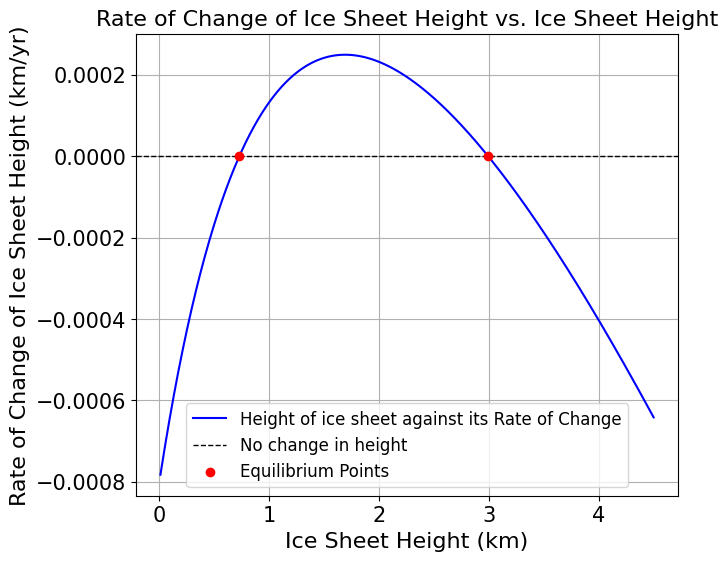

In [ ]:
P = 4.2/1000 # 4.1
r = 10/1000 # 9.4
T0 =  1
hf = 2
F = 0.734/1000  # 0.74
dt = 0.006

# # Create an interpolation function for T(t)
# T_interp = interp1d(sol_T.t, sol_T.y[0], kind='cubic', fill_value="extrapolate")

def dh_dt(t, h, P, r, T0, hf, F, dt):
    dhdt = P - ((r * (T0 + dT(t, dt))) / (h + hf)) - F * h
    if h <= 0 and dhdt < 0:
        dhdt = 0
    return dhdt

def dT(t, dt):
    return dt * t
    #return 0
# Initial condition (starting height of ice sheet)
h0_1 = 1  # Assume initial ice height is 2000m
h0_2 = 0.5

# Time span (years)
t_span = (0, 10000)  # Simulate for 10000 years
t_eval = np.linspace(t_span[0], t_span[1], 10000)  # Generate time points

# Solve the differential equation numerically for 2 start points
sol_h1 = solve_ivp(dh_dt, t_span, [h0_1], args=(P, r, T0, hf, F, dt), t_eval=t_eval)
sol_h2 = solve_ivp(dh_dt, t_span, [h0_2], args=(P, r, T0, hf, F, dt), t_eval=t_eval)

# Plot h vs. time
plt.figure(figsize=(8, 5))
plt.plot(sol_h1.t, sol_h1.y[0], label=rf'Ice Sheet Height for starting height of {h0_1}km', color='b')
plt.plot(sol_h2.t, sol_h2.y[0], label=rf'Ice Sheet Height for starting height of {h0_2}km', color='r')
plt.xlabel('Time (years)', fontsize=16)
plt.ylabel('Ice Sheet Height (km)', fontsize=16)
plt.title('Change in Greenland Ice Sheet Height Over Time', fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

# Generate a **wider range of h values** from near zero to a high number
h_values = np.linspace(0.01, 4.5, 1000)  # Avoid division by zero, range extended

# Compute dh/dt for these h values
dhdt_values = np.array([dh_dt(0, h, P, r, T0, hf, F, dt) for h in h_values])

# Find intersection points where dhdt = 0
zero_crossings = np.where(np.diff(np.sign(dhdt_values)))[0]  # Indices where sign changes
h_intersections = h_values[zero_crossings]  # Corresponding h values

# Plot dh/dt vs. h
plt.figure(figsize=(7, 6))
plt.plot(h_values, dhdt_values, label=r'Height of ice sheet against its Rate of Change', color='b')

# Add dashed horizontal line at dhdt = 0
plt.axhline(0, color='black', linestyle='dashed', linewidth=1, label=r'No change in height')

# Mark the intersection points
plt.scatter(h_intersections, np.zeros_like(h_intersections), color='red', label='Equilibrium Points', zorder=3)

# Labels and title
plt.xlabel('Ice Sheet Height (km)', fontsize=16)
plt.ylabel('Rate of Change of Ice Sheet Height (km/yr)', fontsize=16)
plt.title('Rate of Change of Ice Sheet Height vs. Ice Sheet Height', fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

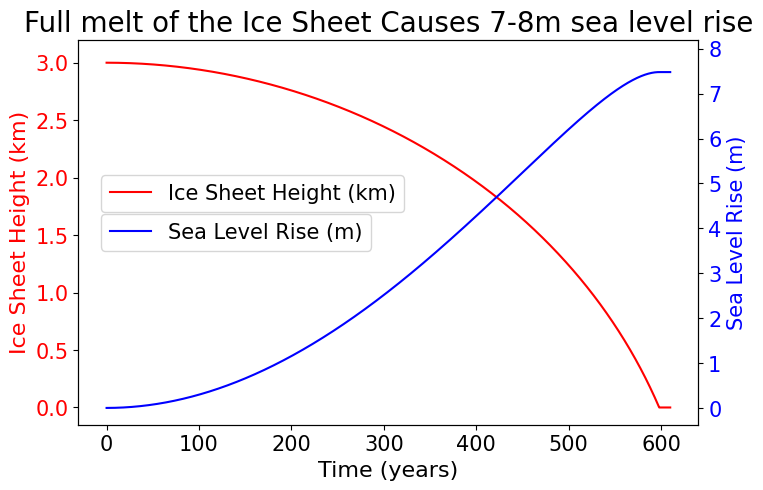

In [ ]:
h0 = 3  # Initial ice sheet height (km)
t_span = (0, 610)
t_eval = np.linspace(t_span[0], t_span[1], 10000)  # Generate time points

sol_h = solve_ivp(dh_dt, t_span, [h0], args=(P, r, T0, hf, F, dt), t_eval=t_eval)
h_values = sol_h.y[0]  # Ice height over time
time_values = sol_h.t  # Time in years


# Ice sheet and ocean parameters
k = 3e5  # Proportionality constant for ice volume (adjust as needed)
A_ocean = 361.0e6  # Global ocean surface area in km²

# Compute ice volume change
V_values = k * h_values**2  # Ice sheet volume over time
V_lost = V_values[0] - V_values  # Volume lost at each time step
SLR_values = V_lost / A_ocean  # Sea level rise in km

# Convert to meters (1 km = 1000 m)
SLR_values *= 1000

# Plot Ice Sheet Height & Sea Level Rise
fig, ax1 = plt.subplots(figsize=(8, 5))

# Ice sheet height plot
ax1.plot(time_values, h_values, 'r-', label="Ice Sheet Height (km)")
ax1.set_xlabel("Time (years)", fontsize=16)
ax1.set_ylim(top=3.2)
ax1.set_ylabel("Ice Sheet Height (km)", color='r', fontsize=16)
ax1.tick_params(axis='y', labelcolor='r', labelsize=15)
ax1.tick_params(axis='x', labelsize=15)

# Create a second y-axis for sea level rise
ax2 = ax1.twinx()
ax2.plot(time_values, SLR_values, 'b-', label="Sea Level Rise (m)")
ax2.set_ylim(top=8.2)  # Set the upper limit of ax1 to 8
ax2.set_ylabel("Sea Level Rise (m)", color='b', fontsize=15)
ax2.tick_params(axis='y', labelcolor='b', labelsize=15)

# Title and legend
plt.title("Full melt of the Ice Sheet Causes 7-8m sea level rise", size=20)
ax1.legend(loc="center left", bbox_to_anchor=(0.02, 0.6), fontsize=15)
ax2.legend(loc="center left", bbox_to_anchor=(0.02, 0.5), fontsize=15)

plt.show()

In [ ]:
# Generate h values to find equilibrium points
h_values = np.linspace(0.01, 4.5, 1000)  # Avoid division by zero
dhdt_values = np.array([dh_dt(0, h, P, r, T0, hf, F, dt) for h in h_values])

# Find equilibrium points (dh/dt = 0)
zero_crossings = np.where(np.diff(np.sign(dhdt_values)))[0]
h_equilibria = h_values[zero_crossings]

# Identify the lower equilibrium
if len(h_equilibria) > 0:
    lower_equilibrium = min(h_equilibria)  # Smallest equilibrium height
    print(f"Lower Equilibrium Height: {lower_equilibrium:.5f} km")
else:
    print("No equilibrium found. Check parameters.")
    lower_equilibrium = None

# Run the simulation from h0 = 3 km until equilibrium
h0 = 3.0  # Initial height (km)
t_span = (0, 10000)  # Max simulation time
t_eval = np.linspace(t_span[0], t_span[1], 10000)

# Define stopping condition
def stopping_condition(t, y, *args):
    return y[0] - lower_equilibrium  # Stop when h reaches lower equilibrium

stopping_condition.terminal = True  # Stops integration when triggered
stopping_condition.direction = -1  # Only stops when crossing downward

# Solve ODE
if lower_equilibrium is not None:
    sol_h = solve_ivp(dh_dt, t_span, [h0], args=(P, r, T0, hf, F, dt),
                      t_eval=t_eval, events=stopping_condition)


    # Extract the stopping time
    if len(sol_h.t_events[0]) > 0:
        time_to_equilibrium = sol_h.t_events[0][0]
        print(f"Time to reach the lower equilibrium: {time_to_equilibrium:.2f} years")
    else:
        print("Simulation did not reach the lower equilibrium within time span.")

Lower Equilibrium Height: 0.72462 km
Time to reach the lower equilibrium: 549.30 years


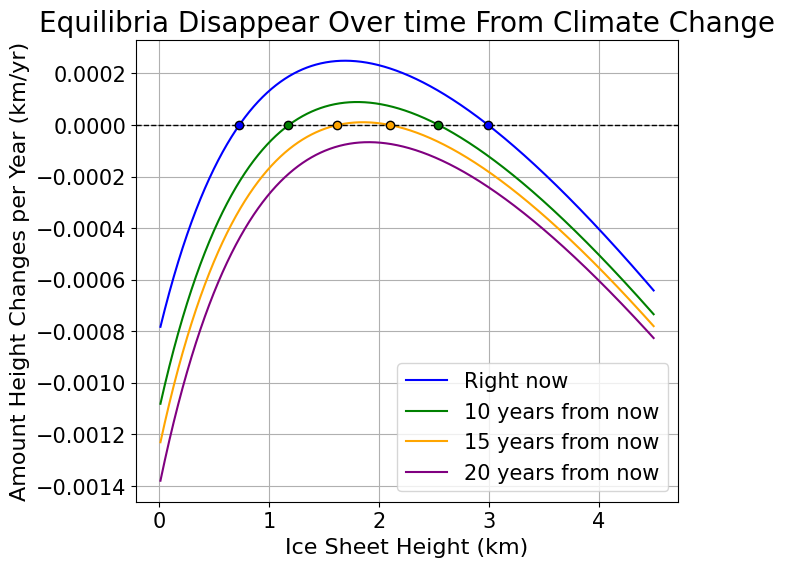

In [ ]:

# Generate h values
h_values = np.linspace(0.01, 4.5, 1000)

# Function to find equilibrium points for a given t
def find_equilibrium(t):
    dhdt_values = np.array([dh_dt(t, h, P, r, T0, hf, F, dt) for h in h_values])
    zero_crossings = np.where(np.diff(np.sign(dhdt_values)))[0]
    h_intersections = h_values[zero_crossings]
    return h_intersections, dhdt_values

# Define time points to plot
time_to_plot = [0,10, 15, 20]
colors = ['b', 'g', 'orange', 'purple']

# Plot all phase planes on the same figure
plt.figure(figsize=(7, 6))

for i, (t, color) in enumerate(zip(time_to_plot, colors)):
    h_eq, dhdt_values = find_equilibrium(t)

    # Assign a different label for the first line
    label = "Right now" if i == 0 else f'{int(t)} years from now'

    # Plot dh/dt vs h
    plt.plot(h_values, dhdt_values, label=label, color=color)

    # Mark equilibrium points
    plt.scatter(h_eq, np.zeros_like(h_eq), color=color, edgecolors='k', zorder=3)

# Dashed horizontal line at dh/dt = 0
plt.axhline(0, color='black', linestyle='dashed', linewidth=1)

# Labels and title
plt.title('Equilibria Disappear Over time From Climate Change', size=20)
plt.xlabel('Ice Sheet Height (km)', size=16)
plt.ylabel('Amount Height Changes per Year (km/yr)', size=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.legend(fontsize=15)
plt.show()

Lower Equilibrium Height: 0.72462 km


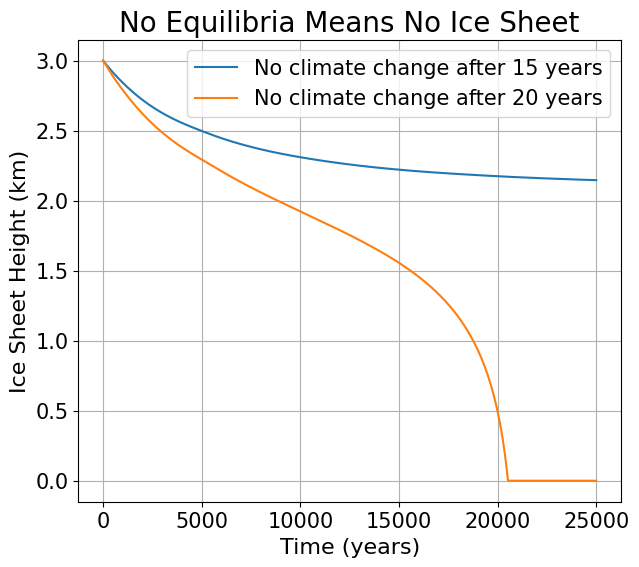

In [ ]:
# Define temperature function that stops increasing after switch_time
def dT_switch(t, dt, switch_time):
    return dt * min(t, switch_time)  # Holds temperature constant after switch_time

# Differential equation for ice height evolution
def dh_dt_switch(t, h, P, r, T0, hf, F, dt, switch_time):
    dhdt = P - ((r * (T0 + dT_switch(t, dt, switch_time))) / (h + hf)) - F * h
    if h <= 0 and dhdt < 0:
        dhdt = 0  # Prevent negative heights
    return dhdt

# Identify equilibrium points
h_values = np.linspace(0.01, 4.5, 1000)
dhdt_values_switch = np.array([dh_dt_switch(0, h, P, r, T0, hf, F, dt, 500) for h in h_values])

zero_crossings = np.where(np.diff(np.sign(dhdt_values_switch)))[0]
h_equilibria = h_values[zero_crossings]

if len(h_equilibria) > 0:
    lower_equilibrium = min(h_equilibria)
    print(f"Lower Equilibrium Height: {lower_equilibrium:.5f} km")
else:
    print("No equilibrium found. Check parameters.")
    lower_equilibrium = None

# Run simulation twice: once stopping dT at 500 years, then at 550 years
switch_times = [15, 20]
simulations = {}

for switch_time in switch_times:
    h0 = 3.0  # Initial height
    t_span = (0, 25000)  # Total simulation time: 1500 years
    t_eval = np.linspace(t_span[0], t_span[1], 5000)

    # Solve ODE without a stopping condition to run full time
    sol_h = solve_ivp(dh_dt_switch, t_span, [h0], args=(P, r, T0, hf, F, dt, switch_time),
                      t_eval=t_eval)

    # Store results
    simulations[switch_time] = sol_h

# Plot results
plt.figure(figsize=(7, 6))

for switch_time, sol in simulations.items():
    plt.plot(sol.t, sol.y[0], label=f"No climate change after {switch_time} years")


plt.xlabel("Time (years)", fontsize=16)
plt.ylabel("Ice Sheet Height (km)", fontsize=16)
plt.title("No Equilibria Means No Ice Sheet", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.legend(fontsize=15)
plt.show()

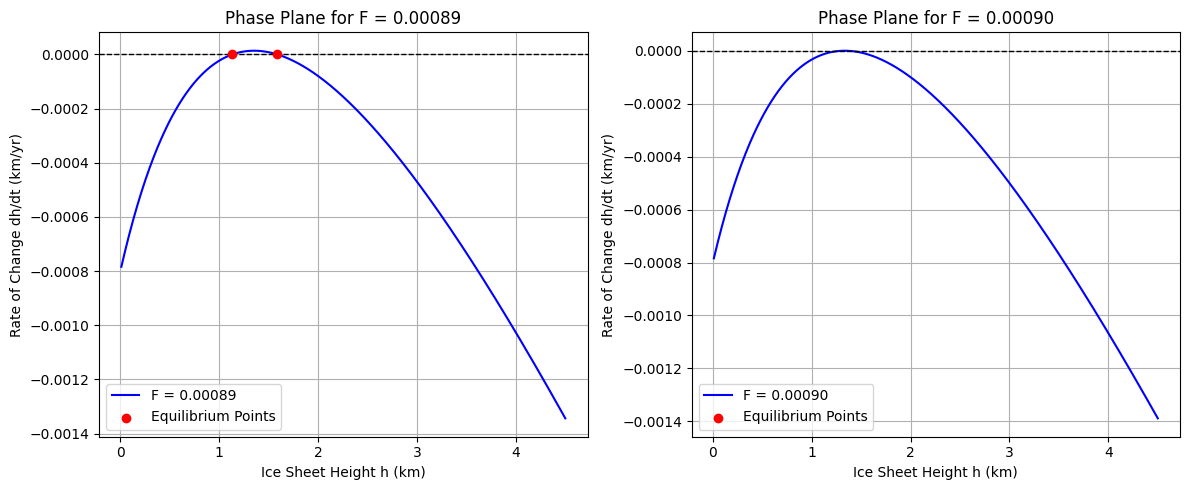

In [ ]:
F_low = 0.00089
F_high = 0.0009

# Create the plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, F in enumerate([F_low, F_high]):
    ax = axes[i]  # Get subplot position
    h_eq, dhdt_values = find_equilibrium(F)

    # Plot dh/dt vs. h
    ax.plot(h_values, dhdt_values, label=f'F = {F:.5f}', color='b')

    # Dashed horizontal line at dh/dt = 0
    ax.axhline(0, color='black', linestyle='dashed', linewidth=1)

    # Mark equilibrium points
    ax.scatter(h_eq, np.zeros_like(h_eq), color='red', zorder=3, label='Equilibrium Points')

    # Labels and title
    ax.set_xlabel('Ice Sheet Height h (km)')
    ax.set_ylabel('Rate of Change dh/dt (km/yr)')
    ax.set_title(f'Phase Plane for F = {F:.5f}')
    ax.grid(True)
    ax.legend()

# Show plot
plt.tight_layout()
plt.show()

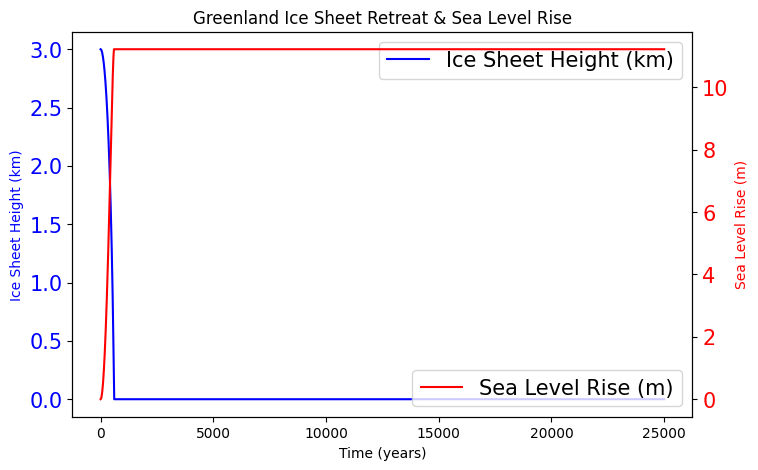

In [ ]:
h0 = 3  # Initial ice sheet height (km)

sol_h = solve_ivp(dh_dt, t_span, [h0], args=(P, r, T0, hf, F, dt), t_eval=t_eval)
h_values = sol_h.y[0]  # Ice height over time
time_values = sol_h.t  # Time in years


# Ice sheet and ocean parameters
k = 4.5e5  # Proportionality constant for ice volume (adjust as needed)
A_ocean = 361.0e6  # Global ocean surface area in km²

# Compute ice volume change
V_values = k * h_values**2  # Ice sheet volume over time
V_lost = V_values[0] - V_values  # Volume lost at each time step
SLR_values = V_lost / A_ocean  # Sea level rise in km

# Convert to meters (1 km = 1000 m)
SLR_values *= 1000

# Plot Ice Sheet Height & Sea Level Rise
fig, ax1 = plt.subplots(figsize=(8, 5))

# Ice sheet height plot
ax1.plot(time_values, h_values, 'b-', label="Ice Sheet Height (km)")
ax1.set_xlabel("Time (years)")
ax1.set_ylabel("Ice Sheet Height (km)", color='b')
ax1.tick_params(axis='y', labelcolor='b', labelsize=15)

# Create a second y-axis for sea level rise
ax2 = ax1.twinx()
ax2.plot(time_values, SLR_values, 'r-', label="Sea Level Rise (m)")
ax2.set_ylabel("Sea Level Rise (m)", color='r')
ax2.tick_params(axis='y', labelcolor='r', labelsize=15)

# Title and legend
plt.title("Greenland Ice Sheet Retreat & Sea Level Rise")
ax1.legend(loc="upper right", fontsize=15)
ax2.legend(loc="lower right", fontsize=15)

plt.show()

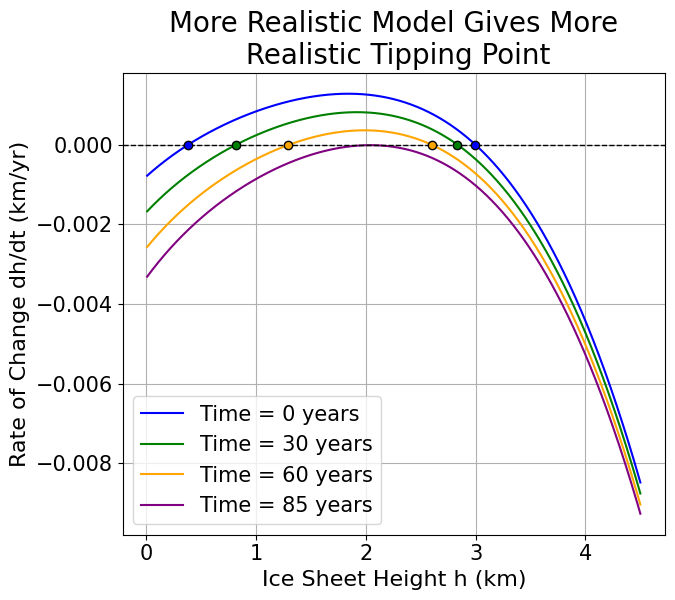

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from matplotlib.gridspec import GridSpec

# Parameters
P = 4.2/1000           # Precipitation rate (km/yr)
r = 10/1000            # Energy transfer coefficient
T0 = 1                 # Base temperature
hf = 2                 # Reference ice thickness for energy transfer
F = 0.734 /1000
F0 = 0.734/(1000*27)   # Base flow rate coefficient
dt = 0.006             # Temperature change rate
n = 3                  # Exponent for ice thickness dependency

def flow_rate(h, F, F0, n):
    """Calculate flow rate based on ice thickness"""
    return F0 * (h**n)
    #return F

def dh_dt(t, h, P, r, T0, hf, F, F0, dt, n):
    """Rate of change of ice height"""
    F = flow_rate(h, F, F0, n)
    dhdt = P - ((r * (T0 + dT(t, dt))) / (h + hf)) - F * h
    if h <= 0 and dhdt < 0:
        dhdt = 0
    return dhdt

def dT(t, dt):
    """Temperature change over time - linear increase"""
    return dt * t
    #return 0

# Reduced time points to analyze (years)
time_points = [0, 15, 84, 85]

# Reduced time span
t_span = (0, 3000)  # Reduced from 10000
t_eval = np.linspace(t_span[0], t_span[1], 500)  # Reduced number of points

# Initial conditions
h0_1 = 3  # km
h0_2 = 0.5  # km

# Solve the differential equation
sol_h1 = solve_ivp(dh_dt, t_span, [h0_1], args=(P, r, T0, hf, F, F0, dt, n), t_eval=t_eval)
sol_h2 = solve_ivp(dh_dt, t_span, [h0_2], args=(P, r, T0, hf, F, F0, dt, n), t_eval=t_eval)

# Generate h values
h_values = np.linspace(0.01, 4.5, 1000)

# Function to find equilibrium points for a given t
def find_equilibrium(t):
    dhdt_values = np.array([dh_dt(t, h, P, r, T0, hf, F, F0, dt, n) for h in h_values])
    zero_crossings = np.where(np.diff(np.sign(dhdt_values)))[0]
    h_intersections = h_values[zero_crossings]
    return h_intersections, dhdt_values

# F values to plot
F_values_to_plot = [0.00074, 0.0008, 0.0009, 0.001]
# Define time points to plot
time_to_plot = [0, 30, 60, 85]
colors = ['b', 'g', 'orange', 'purple']

# Plot all phase planes on the same figure
plt.figure(figsize=(7, 6))

for t, color in zip(time_to_plot, colors):
    h_eq, dhdt_values = find_equilibrium(t)

    # Plot dh/dt vs h
    plt.plot(h_values, dhdt_values, label=f'Time = {int(t)} years', color=color)

    # Mark equilibrium points
    plt.scatter(h_eq, np.zeros_like(h_eq), color=color, edgecolors='k', zorder=3)

# Dashed horizontal line at dh/dt = 0
plt.axhline(0, color='black', linestyle='dashed', linewidth=1)

# Labels and title
plt.title('More Realistic Model Gives More\n Realistic Tipping Point', size=20)
plt.xlabel('Ice Sheet Height h (km)', size=16)
plt.ylabel('Rate of Change dh/dt (km/yr)', size=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.legend(fontsize=15)
plt.show()
